In [1]:
import sys
import importlib as imp
sys.path.insert(0, r"C:\users\pairwin\Documents\Github\HelperPI")
#sys.path.insert(0, r'/home/pirwin/Git/HelperPI')
#imp.reload(HelperPI)
import HelperPI
import itertools
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.special import inv_boxcox
from scipy.stats.distributions import uniform, lognorm
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as sts
import numpy as np
import math
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from scipy import interp
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoLars, HuberRegressor, ElasticNet, Ridge
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11,8)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
helper = HelperPI.Helper()

INFO:root:Initializing...


In [ ]:
sql = helper.getSQL(path=r'C:\Users\pairwin\Documents\GitHub\IPy_Notebooks\SQL\Contest_Sql.sql')
base, dtypedf = helper.readData(sql)

INFO:root:Reading data...


In [392]:
mean = np.mean(base['SALES_TARGET_N12'])
std = np.std(base['SALES_TARGET_N12'])
mean, std

base = base[base['SALES_TARGET_N12'] > 0]

base['SALES_TARGET_N12_CBRT'], lmda = stats.boxcox(base['SALES_TARGET_N12'])
base.describe()

,SALES_R12,SALES_R24,SALES_R48,SALES_RLT,FISHING_MARINE_SALES_LT,CAMPING_WATERSPORTS_SALES_LT,HUNTING_HUNTCLOTH_SALES_LT,FOOTWEAR_SALES_LT,SHOOTING_SALES_LT,GIFT_SALES_LT,APPAREL_SALES_LT,OTHER_SALES_LT,VISITS_LT,FISH_MARINE_PERC,CAMPING_WATERSPORTS_PERC,HUNTING_PERC,FOOTWEAR_PERC,SHOOTING_PERC,GIFT_PERC,APPAREL_PERC,OTHER_PERC,DAYS_SINCE_PURCHASE,DAYS_AS_CUSTOMER,REWARDS_CUSTOMER,YOY_TREND,SALES_TARGET_N12,SALES_TARGET_N12_CBRT
count,17949.000000,17949.000000,17949.000000,17949.000000,17949.000000,17949.000000,17949.000000,17949.000000,17949.000000,17949.000000,17949.000000,17949.000000,17949.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17921.000000,17949.000000,17949.000000,17949.000000,17949.000000
mean,254.654144,495.370172,921.357336,1802.645729,546.436163,152.183954,378.671855,120.837777,260.309758,76.664087,240.066743,27.475391,17.653853,0.249563,0.096697,0.171170,0.082160,0.120277,0.075146,0.187100,0.017888,687.736008,2475.544166,0.688228,0.773207,278.152543,5.085189
std,631.256942,1318.097795,2227.795329,4629.991690,3495.391549,347.878132,1060.221867,253.431088,888.688305,194.402474,489.863297,98.644226,34.397536,0.310282,0.176175,0.237523,0.158666,0.220960,0.162910,0.246623,0.075127,341.948707,1338.797246,0.463230,10.916993,804.320255,1.538900
min,0.000000,0.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,365.000000,365.000000,0.000000,-1.000000,0.590000,-0.523916
25%,0.000000,42.060000,105.010000,169.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,436.000000,1211.000000,0.000000,-0.687551,46.280000,4.038904
50%,73.973000,175.820000,345.840000,625.200000,58.490000,20.980000,38.720000,11.990000,0.000000,14.610000,67.930000,0.000000,7.000000,0.097833,0.025182,0.056485,0.011969,0.000000,0.019346,0.090255,0.000000,557.000000,2507.000000,1.000000,0.000000,114.970000,5.059875
75%,269.600000,544.350000,1028.820000,1983.390000,393.530000,153.940000,289.960000,139.920000,145.750000,70.110000,255.130000,7.990000,20.000000,0.434485,0.110558,0.269873,0.095712,0.136333,0.070060,0.260312,0.003552,821.000000,3862.000000,1.000000,0.000000,293.910000,6.139424
max,29453.000000,100919.900000,162153.750000,426433.550000,414126.310000,8101.030000,32078.970000,7005.880000,56987.490000,4524.430000,9522.400000,2405.300000,1528.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3998.000000,4322.000000,1.000000,817.735450,76137.550000,13.119082


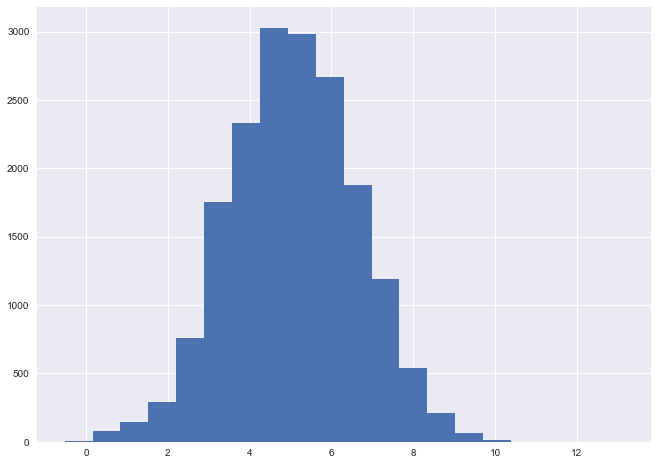

In [394]:
plt.hist(base['SALES_TARGET_N12_CBRT'], bins=20)
plt.show()

In [395]:
base['SALES_TARGET_N12'].describe()

count    17949.000000
mean       278.152543
std        804.320255
min          0.590000
25%         46.280000
50%        114.970000
75%        293.910000
max      76137.550000
Name: SALES_TARGET_N12, dtype: float64

In [396]:
collist = ['SALES_R12','SALES_R24','SALES_R48','SALES_RLT','FISHING_MARINE_SALES_LT','CAMPING_WATERSPORTS_SALES_LT',
         'HUNTING_HUNTCLOTH_SALES_LT','FOOTWEAR_SALES_LT','SHOOTING_SALES_LT','GIFT_SALES_LT','APPAREL_SALES_LT',
         'OTHER_SALES_LT','VISITS_LT','FISH_MARINE_PERC','CAMPING_WATERSPORTS_PERC','HUNTING_PERC','FOOTWEAR_PERC',
         'SHOOTING_PERC','GIFT_PERC','APPAREL_PERC','OTHER_PERC','DAYS_SINCE_PURCHASE','DAYS_AS_CUSTOMER','REWARDS_CUSTOMER',
         'YOY_TREND','SALES_TARGET_N12','SALES_TARGET_N12_CBRT']
collist_X = ['SALES_R12','SALES_R24','SALES_R48','SALES_RLT','FISHING_MARINE_SALES_LT','CAMPING_WATERSPORTS_SALES_LT',
         'HUNTING_HUNTCLOTH_SALES_LT','FOOTWEAR_SALES_LT','SHOOTING_SALES_LT','GIFT_SALES_LT','APPAREL_SALES_LT',
         'OTHER_SALES_LT','VISITS_LT','FISH_MARINE_PERC','CAMPING_WATERSPORTS_PERC','HUNTING_PERC','FOOTWEAR_PERC',
         'SHOOTING_PERC','GIFT_PERC','APPAREL_PERC','OTHER_PERC','DAYS_SINCE_PURCHASE','DAYS_AS_CUSTOMER','REWARDS_CUSTOMER',
         'YOY_TREND']
collist_y = ['SALES_TARGET_N12_CBRT']


In [397]:
train, test = helper.splitData(base[collist], .8)

train, val = helper.splitData(train, 0.5)

print(train.shape, val.shape, test.shape)

train_X = train[collist_X]

train_y = train[collist_y].as_matrix().ravel()
val_X = val[collist_X]
val_y = val[collist_y].as_matrix().ravel()
test_X = test[collist_X]
test_y = test[collist_y].as_matrix().ravel()


interactions = helper.find_iteractions(train_X, train_y)
interactions.to_csv('interactions.csv')

(7179, 27) (7180, 27) (3590, 27)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


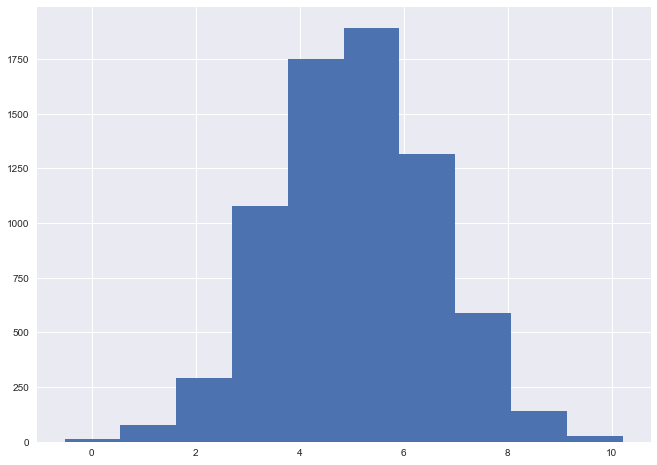

In [399]:
plt.hist(train_y, bins = 10)
plt.show()

In [400]:
collist_X = ['SALES_R12','SALES_R24','SALES_R48','SALES_RLT','FISHING_MARINE_SALES_LT','CAMPING_WATERSPORTS_SALES_LT',
         'HUNTING_HUNTCLOTH_SALES_LT','FOOTWEAR_SALES_LT','SHOOTING_SALES_LT','GIFT_SALES_LT','APPAREL_SALES_LT',
         'OTHER_SALES_LT','VISITS_LT','FISH_MARINE_PERC','CAMPING_WATERSPORTS_PERC','HUNTING_PERC','FOOTWEAR_PERC',
         'SHOOTING_PERC','GIFT_PERC','APPAREL_PERC','OTHER_PERC','DAYS_SINCE_PURCHASE','DAYS_AS_CUSTOMER','REWARDS_CUSTOMER',
         'YOY_TREND', 'SALES_R12*REWARDS_CUSTOMER']

train_X['SALES_R12*REWARDS_CUSTOMER'] = train_X['SALES_R12']*train_X['REWARDS_CUSTOMER']
val_X['SALES_R12*REWARDS_CUSTOMER'] = val_X['SALES_R12']*val_X['REWARDS_CUSTOMER']
test_X['SALES_R12*REWARDS_CUSTOMER'] = test_X['SALES_R12']*test_X['REWARDS_CUSTOMER']

imr = Imputer(missing_values='NaN',strategy='median',axis=0)
imr = imr.fit(train_X)


for var in collist_X:
    name = var + '_sqrt'
    train_X[name] = np.sqrt(train_X[var])
    val_X[name] = np.sqrt(val_X[var])
    test_X[name] = np.sqrt(test_X[var])
    name = var + '_cbrt'
    train_X[name] = np.cbrt(train_X[var])
    val_X[name] = np.cbrt(val_X[var])
    test_X[name] = np.cbrt(test_X[var])
    name = var + '_log'
    train_X[name] = np.log(train_X[var]+1)
    val_X[name] = np.log(val_X[var]+1)
    test_X[name] = np.log(test_X[var]+1)
    name = var + '_sq'
    train_X[name] = np.power(train_X[var], 2)
    val_X[name] = np.power(val_X[var], 2)
    test_X[name] = np.power(test_X[var], 2)
   
    
collist_X_expanded = train_X.columns.values


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


In [401]:
collist_X_expanded = collist_X_expanded.tolist()

In [402]:
missing_df = train_X.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_X.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.01]



,column_name,missing_count,missing_ratio
122,YOY_TREND_sqrt,2867,0.399359


In [403]:

imputed_data = pd.DataFrame(imr.transform(train_X.values), columns = collist_X_expanded)

# stdsc = MinMaxScaler()
# stdsc.fit(imputed_data)

# train_X = pd.DataFrame(stdsc.transform(imputed_data), columns = collist_X)
train_X = imputed_data

imputed_data = pd.DataFrame(imr.transform(val_X.values), columns = collist_X_expanded)
#val_X = pd.DataFrame(stdsc.transform(imputed_data), columns = collist_X)
val_X = imputed_data
imputed_data = pd.DataFrame(imr.transform(test_X.values), columns = collist_X_expanded)
#test_X = pd.DataFrame(stdsc.transform(imputed_data), columns = collist_X)
test_X = imputed_data


Anderson-Darling: 0.9988143342343392 Critical Value: 0.787 
train_y is not normally distributed


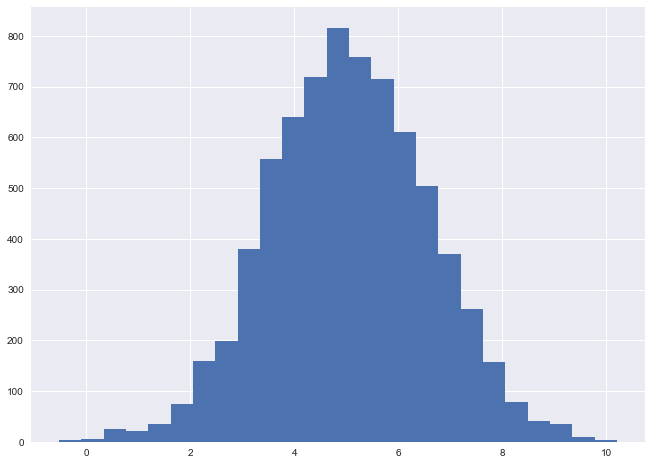

In [404]:
stat, cv, sig = stats.anderson(train_y, 'norm')
print('Anderson-Darling: {} Critical Value: {} '.format(stat, cv[2]))
if stat > cv[2]:
    print('train_y is not normally distributed')
else:
    print('train_y is normally distributed')
plt.hist(train_y, bins=25)
plt.show()

In [405]:
matplotlib.rcParams['figure.figsize'] = (5,2)

#collist_X_expanded.remove('VISITS_LT_sqrt')
#collist_X_expanded.remove('YOY_TREND_log')


train_X = train_X[collist_X_expanded]

collist_X_expanded = sorted(collist_X_expanded, key=str.lower)



for var in collist_X_expanded: 
    vardf = train_X[var]
    #print(vardf.head())
    coef, pval = stats.pearsonr(vardf.as_matrix(), train_y)
    print('%50s Corr Coef: %7s - pval:  %.4f' % (var, str(round(coef,2)), pval))
    #plt.hist(train_X[var], bins = 100)
    #plt.show()
    
matplotlib.rcParams['figure.figsize'] = (11,8)

                                      APPAREL_PERC Corr Coef:   -0.04 - pval:  0.0002
                                 APPAREL_PERC_cbrt Corr Coef:    0.07 - pval:  0.0000
                                  APPAREL_PERC_log Corr Coef:   -0.03 - pval:  0.0062
                                   APPAREL_PERC_sq Corr Coef:   -0.08 - pval:  0.0000
                                 APPAREL_PERC_sqrt Corr Coef:    0.03 - pval:  0.0176
                                  APPAREL_SALES_LT Corr Coef:    0.29 - pval:  0.0000
                             APPAREL_SALES_LT_cbrt Corr Coef:    0.33 - pval:  0.0000
                              APPAREL_SALES_LT_log Corr Coef:    0.29 - pval:  0.0000
                               APPAREL_SALES_LT_sq Corr Coef:    0.16 - pval:  0.0000
                             APPAREL_SALES_LT_sqrt Corr Coef:    0.33 - pval:  0.0000
                          CAMPING_WATERSPORTS_PERC Corr Coef:   -0.02 - pval:  0.1022
                     CAMPING_WATERSPORTS_PERC_cbrt Cor

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3018: RuntimeWarning: invalid value encountered in subtract
  xm, ym = x - mx, y - my
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [408]:
collist_X_expanded = ['APPAREL_PERC_sq','APPAREL_SALES_LT_cbrt','CAMPING_WATERSPORTS_PERC_cbrt',
                      'CAMPING_WATERSPORTS_SALES_LT_cbrt','DAYS_AS_CUSTOMER_sq','DAYS_SINCE_PURCHASE_log',
                      'FISH_MARINE_PERC_cbrt','FISHING_MARINE_SALES_LT_cbrt','FOOTWEAR_PERC_cbrt','FOOTWEAR_SALES_LT_sqrt',
                      'GIFT_PERC','GIFT_SALES_LT_sqrt','HUNTING_HUNTCLOTH_SALES_LT_cbrt','HUNTING_PERC_cbrt','OTHER_PERC_cbrt',
                      'OTHER_SALES_LT_cbrt','REWARDS_CUSTOMER','SALES_R12*REWARDS_CUSTOMER_sqrt','SALES_R12_sqrt',
                      'SALES_R24_sqrt','SALES_R48_cbrt','SALES_RLT_cbrt','SHOOTING_PERC_cbrt','SHOOTING_SALES_LT_cbrt',
                      'VISITS_LT_cbrt','YOY_TREND_cbrt']
train_X = train_X[collist_X_expanded]

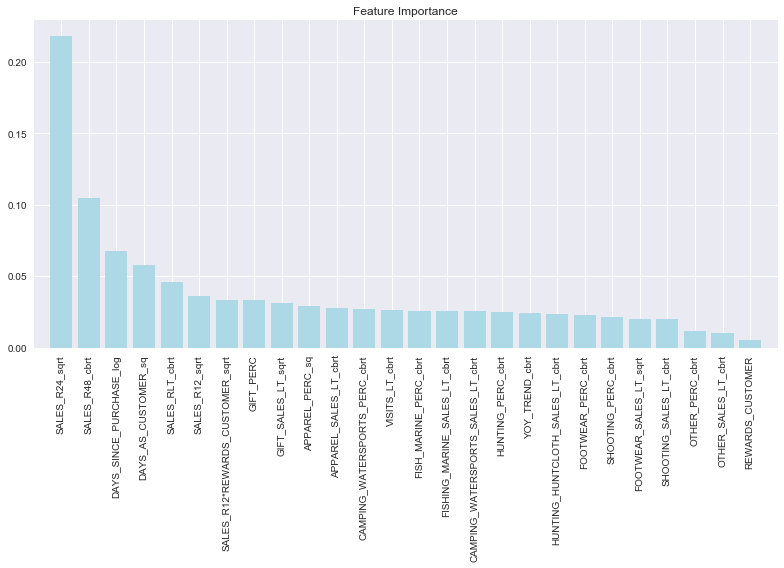

In [409]:
feat_labels = np.asarray(collist_X_expanded)

forests = RandomForestRegressor(n_estimators=100,
                                random_state=0,
                                n_jobs=-1)
forests.fit(train_X, train_y)
importances = forests.feature_importances_
indices = np.argsort(importances)[::-1]
# for f in range(train_X2.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
#                                       importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(train_X.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(train_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

In [410]:
slct = SelectKBest(f_regression, k=15)
slct.fit(train_X, train_y)
selected = slct.get_support()

feat_labels2 = feat_labels[selected]
feat_labels2

array(['APPAREL_SALES_LT_cbrt', 'CAMPING_WATERSPORTS_SALES_LT_cbrt',
       'DAYS_SINCE_PURCHASE_log', 'FISHING_MARINE_SALES_LT_cbrt',
       'FOOTWEAR_SALES_LT_sqrt', 'GIFT_SALES_LT_sqrt',
       'HUNTING_HUNTCLOTH_SALES_LT_cbrt', 'REWARDS_CUSTOMER',
       'SALES_R12*REWARDS_CUSTOMER_sqrt', 'SALES_R12_sqrt',
       'SALES_R24_sqrt', 'SALES_R48_cbrt', 'SALES_RLT_cbrt',
       'SHOOTING_SALES_LT_cbrt', 'VISITS_LT_cbrt'], 
      dtype='<U33')

### Calculate Feature Correlations and VIF scores

   VIF Factor                            feature
0    5.017464              APPAREL_SALES_LT_cbrt
7    4.691106                   REWARDS_CUSTOMER
6    4.197943    HUNTING_HUNTCLOTH_SALES_LT_cbrt
1    3.892329  CAMPING_WATERSPORTS_SALES_LT_cbrt
2    3.585970            DAYS_SINCE_PURCHASE_log
4    3.335469             FOOTWEAR_SALES_LT_sqrt
5    3.329229                 GIFT_SALES_LT_sqrt
3    3.198308       FISHING_MARINE_SALES_LT_cbrt
8    2.965430    SALES_R12*REWARDS_CUSTOMER_sqrt
9    2.791323             SHOOTING_SALES_LT_cbrt


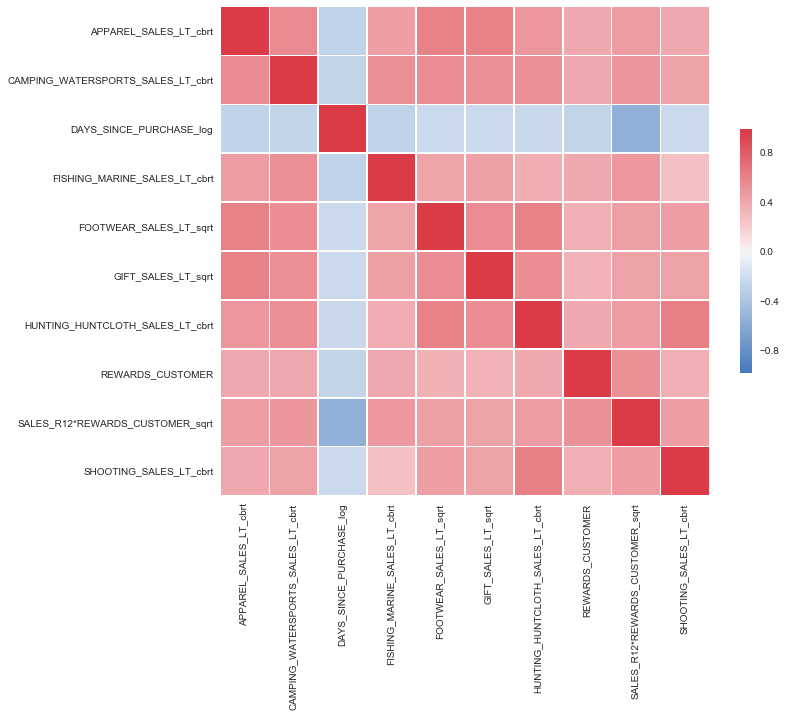

In [415]:
collist_X2 = ['APPAREL_SALES_LT_cbrt', 'CAMPING_WATERSPORTS_SALES_LT_cbrt',
       'DAYS_SINCE_PURCHASE_log', 'FISHING_MARINE_SALES_LT_cbrt',
       'FOOTWEAR_SALES_LT_sqrt', 'GIFT_SALES_LT_sqrt',
       'HUNTING_HUNTCLOTH_SALES_LT_cbrt', 'REWARDS_CUSTOMER',
       'SALES_R12*REWARDS_CUSTOMER_sqrt','SHOOTING_SALES_LT_cbrt']

#collist_X2 = feat_labels2.tolist()

train_X2 = train_X[collist_X2]
    
corr = train_X2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


print(helper.calc_VIFs(train_X2))

In [416]:
param_test1 = {
     'learning_rate':uniform(0.01,0.09),
     'max_depth':list(range(5,20)),
     'min_child_weight':list(range(1,10)),
     'colsample_bytree': uniform(0.5,0.4),
     'subsample': uniform(0.5,0.4),
     'reg_alpha': uniform(0.1, 0.9),
     'reg_lambda': uniform(0.1, 0.9),
     'objective':['reg:linear'],
     'gamma':lognorm(0.1, 1.0)
}


gsearch1 = RandomizedSearchCV(estimator = xgb.XGBRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=100,
                              cv=5)
start = time()
gsearch1.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.cv_results_['params'])))

helper.report(gsearch1)    

Parameter search took 133.04 seconds for 100 candidate parameter settings.
Best Mean validation score: -1.784 (std: 0.417)
Parameters: {'colsample_bytree': 0.76339995828881224, 'gamma': 1.9419027191039027, 'learning_rate': 0.045403635710631315, 'max_depth': 6, 'min_child_weight': 7, 'objective': 'reg:linear', 'reg_alpha': 0.89787387491360682, 'reg_lambda': 0.40170218746442377, 'subsample': 0.73044093697723267}


In [418]:

tuned_model = xgb.XGBRegressor( 
                        learning_rate = 0.05,
                        n_estimators = 118,
                        max_depth = 6,
                        min_child_weight = 7,
                        subsample = 0.73,
                        colsample_bytree = 0.76,
                        objective = 'reg:linear',
                        reg_alpha= 0.9,
                        reg_lambda = 0.40,
                        gamma = 1.94,
                        seed = 27)
xgbmodel = tuned_model.fit(train_X2.values, train_y, 
                 eval_set=[(train_X2.values, train_y), (val_X[collist_X2].values, val_y), (test_X[collist_X2].values, test_y)], 
                 eval_metric='rmse',
                 early_stopping_rounds=100,                 
                 verbose=True)

# fig, ax = plt.subplots(figsize=(12,18))
# xgb.plot_importance(xgbmodel, height=0.8, ax=ax)
# plt.show()

[0]	validation_0-rmse:4.58468	validation_1-rmse:4.6382	validation_2-rmse:4.63961
Multiple eval metrics have been passed: 'validation_2-rmse' will be used for early stopping.

Will train until validation_2-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:4.37569	validation_1-rmse:4.42841	validation_2-rmse:4.42962
[2]	validation_0-rmse:4.17723	validation_1-rmse:4.22926	validation_2-rmse:4.23048
[3]	validation_0-rmse:3.99133	validation_1-rmse:4.04297	validation_2-rmse:4.04527
[4]	validation_0-rmse:3.81517	validation_1-rmse:3.86625	validation_2-rmse:3.86845
[5]	validation_0-rmse:3.64813	validation_1-rmse:3.69874	validation_2-rmse:3.70126
[6]	validation_0-rmse:3.4902	validation_1-rmse:3.54078	validation_2-rmse:3.54323
[7]	validation_0-rmse:3.3404	validation_1-rmse:3.39081	validation_2-rmse:3.39328
[8]	validation_0-rmse:3.20062	validation_1-rmse:3.25072	validation_2-rmse:3.25381
[9]	validation_0-rmse:3.06782	validation_1-rmse:3.11802	validation_2-rmse:3.12074
[10]	validation_0-rmse:

[98]	validation_0-rmse:1.19596	validation_1-rmse:1.33813	validation_2-rmse:1.33261
[99]	validation_0-rmse:1.19485	validation_1-rmse:1.33819	validation_2-rmse:1.33279
[100]	validation_0-rmse:1.19455	validation_1-rmse:1.33824	validation_2-rmse:1.33268
[101]	validation_0-rmse:1.1937	validation_1-rmse:1.3383	validation_2-rmse:1.33261
[102]	validation_0-rmse:1.19299	validation_1-rmse:1.33826	validation_2-rmse:1.33253
[103]	validation_0-rmse:1.19217	validation_1-rmse:1.33844	validation_2-rmse:1.33287
[104]	validation_0-rmse:1.19115	validation_1-rmse:1.33854	validation_2-rmse:1.33305
[105]	validation_0-rmse:1.19019	validation_1-rmse:1.33869	validation_2-rmse:1.3328
[106]	validation_0-rmse:1.18981	validation_1-rmse:1.33874	validation_2-rmse:1.33289
[107]	validation_0-rmse:1.18898	validation_1-rmse:1.33862	validation_2-rmse:1.33272
[108]	validation_0-rmse:1.1885	validation_1-rmse:1.33852	validation_2-rmse:1.33279
[109]	validation_0-rmse:1.18751	validation_1-rmse:1.33852	validation_2-rmse:1.3325

In [420]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, xgbmodel.predict(train_X[collist_X2].values)
y_true, y_pred = val_y, xgbmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, xgbmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))


The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.404404082663
RMSE Train: 1.1793336236923597
RMSE Val: 1.3391551565744941
RMSE Test: 1.3322879803306342


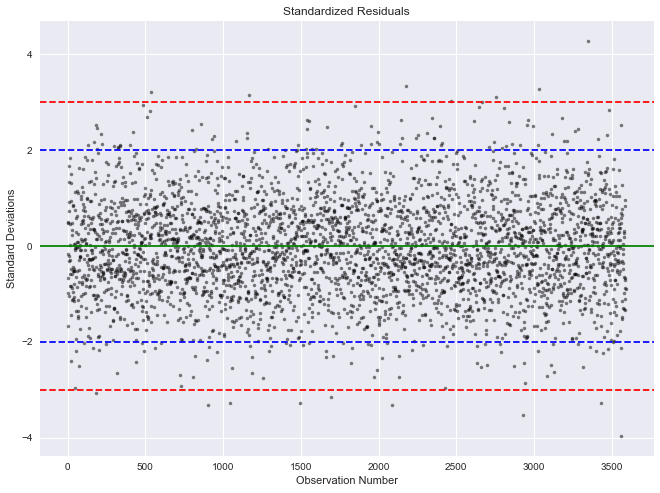

In [421]:
plotdata = pd.DataFrame({'true':y_true2.tolist(),'pred':y_pred2.tolist()})
plotdata['resid'] = plotdata['pred']-plotdata['true']
plotdata['stdresid'] = plotdata['resid']/np.std(plotdata['resid'])

plt.plot(plotdata['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

In [426]:
param_test1 = {
     'alpha': uniform(0.1, 10.0),
     'eps':uniform(0.1, 0.9)
}


clf = RandomizedSearchCV(estimator = LassoLars(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=500)
start = time()
clf.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))

helper.report(clf)    
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, clf.predict(train_X2.values)
y_true, y_pred = val_y, clf.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, clf.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

lassomodel = clf

Parameter search took 9.42 seconds for 500 candidate parameter settings.
Best Mean validation score: -2.336 (std: 0.000)
Parameters: {'alpha': 6.7082311049442591, 'eps': 0.59816369263638269}

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.0
RMSE Train: 1.5281318399716215
RMSE Val: 1.5468373620130762
RMSE Test: 1.5457637377017264


In [425]:
param_test1 = {
     'alpha': uniform(0.1, 10.0),
     'l1_ratio':uniform(0.1, 0.9),
     'selection':['random']
}


clf = RandomizedSearchCV(estimator = ElasticNet(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=3,
                              n_iter=300)
start = time()
clf.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))

helper.report(clf)    
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, clf.predict(train_X2.values)
y_true, y_pred = val_y, clf.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, clf.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))
elasticmodel = clf

Parameter search took 5.46 seconds for 300 candidate parameter settings.
Best Mean validation score: -1.777 (std: 0.133)
Parameters: {'alpha': 0.14352902423443328, 'l1_ratio': 0.2161021069798707, 'selection': 'random'}

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.2406238164
RMSE Train: 1.3316476003648845
RMSE Val: 1.3388638648340248
RMSE Test: 1.3399841727161121


In [428]:
param_test1 = {
     'alpha':uniform(0.0,1.0),
    
}


clf = RandomizedSearchCV(estimator = MLPRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_absolute_error',
                              n_jobs=3,
                              n_iter=100)
start = time()
clf.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))

helper.report(clf)    
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, clf.predict(train_X2.values)
y_true, y_pred = val_y, clf.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, clf.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))
mlpmodel = clf

Parameter search took 193.75 seconds for 100 candidate parameter settings.
Best Mean validation score: -1.070 (std: 0.004)
Parameters: {'alpha': 0.77803884773825926}

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.244823233099
RMSE Train: 1.3279604318686211
RMSE Val: 1.355893966576971
RMSE Test: 1.3638271199406657


In [429]:
#sgdpred = sgdmodel.predict(train_X_std_res)
xgbpred = xgbmodel.predict(val_X[collist_X2].values)
elasticpred = elasticmodel.predict(val_X[collist_X2].values)
lassopred = lassomodel.predict(val_X[collist_X2].values)
mlppred = mlpmodel.predict(val_X[collist_X2].values)

resarray = np.array([val_y, xgbpred, elasticpred, lassopred, mlppred], np.float64)

xgb_test = xgbmodel.predict(test_X[collist_X2].values)
elastic_test = elasticmodel.predict(test_X[collist_X2].values)
lasso_test = lassomodel.predict(test_X[collist_X2].values)
mlp_test = mlpmodel.predict(test_X[collist_X2].values)

res_test = np.array([test_y, xgb_test, elastic_test, lasso_test, mlp_test], np.float64)

result = pd.DataFrame(resarray.transpose(), columns = ['true_y','xgbpred', 'elasticpred','lassopred', 'mlppred'])
result_test = pd.DataFrame(res_test.transpose(), columns = ['true_y','xgbpred', 'elasticpred','lassopred','mlppred'])
result.describe()

ensX = result[['xgbpred', 'elasticpred','mlppred']].values
ensy = result[['true_y']].values

finX = result_test[['xgbpred', 'elasticpred','mlppred']].values
finy = result_test[['true_y']].values

In [ ]:
param_test1 = {
     'learning_rate':[0.01],
     'max_depth':list(range(5,20)),
     'min_child_weight':list(range(1,10)),
     'colsample_bytree': uniform(0.5,0.4),
     'subsample': uniform(0.5,0.4),
     'reg_alpha': uniform(0.1, 0.9),
     'reg_lambda': uniform(0.1, 0.9),
     'objective':['reg:linear'],
     'gamma': uniform(0.1,0.9)
}


gsearch1 = RandomizedSearchCV(estimator = xgb.XGBRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_absolute_error',
                              n_jobs=-1,
                              n_iter=200,
                              cv=5)
start = time()
gsearch1.fit(ensX, ensy)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.cv_results_['params'])))

helper.report(gsearch1)    

((43750, 3), (43750, 1))

In [337]:
#max_depth = 10
#min_child_weight = 1
#colsample_bytree = 0.7
#subsample = 1.0

metamodel = xgb.XGBRegressor( 
                        learning_rate = 0.01,
                        n_estimators = 507,
                        max_depth = 5,
                        min_child_weight = 7,
                        subsample = 0.83,
                        colsample_bytree = 0.72,
                        objective = 'reg:linear',
                        reg_alpha= 0.36,
                        reg_lambda = 0.79,
                        gamma = 0.29,
                        seed = 27)
metamodel = metamodel.fit(ensX, ensy, 
                 eval_set=[(finX, finy)], 
                 eval_metric='rmse',
                 early_stopping_rounds=100,                 
                 verbose=True)

[0]	validation_0-rmse:5.22971
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:5.18441
[2]	validation_0-rmse:5.13961
[3]	validation_0-rmse:5.09527
[4]	validation_0-rmse:5.05145
[5]	validation_0-rmse:5.00818
[6]	validation_0-rmse:4.96537
[7]	validation_0-rmse:4.92311
[8]	validation_0-rmse:4.88126
[9]	validation_0-rmse:4.83996
[10]	validation_0-rmse:4.7991
[11]	validation_0-rmse:4.7587
[12]	validation_0-rmse:4.71881
[13]	validation_0-rmse:4.67942
[14]	validation_0-rmse:4.64047
[15]	validation_0-rmse:4.60195
[16]	validation_0-rmse:4.56394
[17]	validation_0-rmse:4.52634
[18]	validation_0-rmse:4.48914
[19]	validation_0-rmse:4.45236
[20]	validation_0-rmse:4.41608
[21]	validation_0-rmse:4.38023
[22]	validation_0-rmse:4.34479
[23]	validation_0-rmse:4.30981
[24]	validation_0-rmse:4.27525
[25]	validation_0-rmse:4.24107
[26]	validation_0-rmse:4.20729
[27]	validation_0-rmse:4.17396
[28]	validation_0-rmse:4.14114
[29]	validation_0-rmse:4.10859
[30]	validation_

[259]	validation_0-rmse:1.96435
[260]	validation_0-rmse:1.96372
[261]	validation_0-rmse:1.96311
[262]	validation_0-rmse:1.96253
[263]	validation_0-rmse:1.96196
[264]	validation_0-rmse:1.96138
[265]	validation_0-rmse:1.96083
[266]	validation_0-rmse:1.96031
[267]	validation_0-rmse:1.95979
[268]	validation_0-rmse:1.95928
[269]	validation_0-rmse:1.95877
[270]	validation_0-rmse:1.95826
[271]	validation_0-rmse:1.95777
[272]	validation_0-rmse:1.95727
[273]	validation_0-rmse:1.9568
[274]	validation_0-rmse:1.95635
[275]	validation_0-rmse:1.9559
[276]	validation_0-rmse:1.95546
[277]	validation_0-rmse:1.95502
[278]	validation_0-rmse:1.95461
[279]	validation_0-rmse:1.95419
[280]	validation_0-rmse:1.95378
[281]	validation_0-rmse:1.95338
[282]	validation_0-rmse:1.95298
[283]	validation_0-rmse:1.95258
[284]	validation_0-rmse:1.95221
[285]	validation_0-rmse:1.95184
[286]	validation_0-rmse:1.95148
[287]	validation_0-rmse:1.95113
[288]	validation_0-rmse:1.9508
[289]	validation_0-rmse:1.95048
[290]	valid

In [338]:
y_true, y_pred = ensy, metamodel.predict(ensX)
y_true2, y_pred2 = finy, metamodel.predict(finX)
y_true = invbox_cox(y_true, lmda)
y_pred = invbox_cox(y_pred, lmda)
y_true2 = invbox_cox(y_true2, lmda)
y_pred2 = invbox_cox(y_pred2, lmda)
print('R2 Train: ' + str(r2_score(y_true, y_pred)))
print('MAE Val: ' + str(mean_absolute_error(y_true, y_pred)))
print('MAE test: ' + str(mean_absolute_error(y_true2, y_pred2)))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE: ' + str(rmse))

testing = pd.DataFrame({'true':y_true2[:,0], 'pred':y_pred2})


R2 Train: 0.21919713033
MAE Val: 161.899997873
MAE test: 161.874467394
RMSE: 289.7463392721121


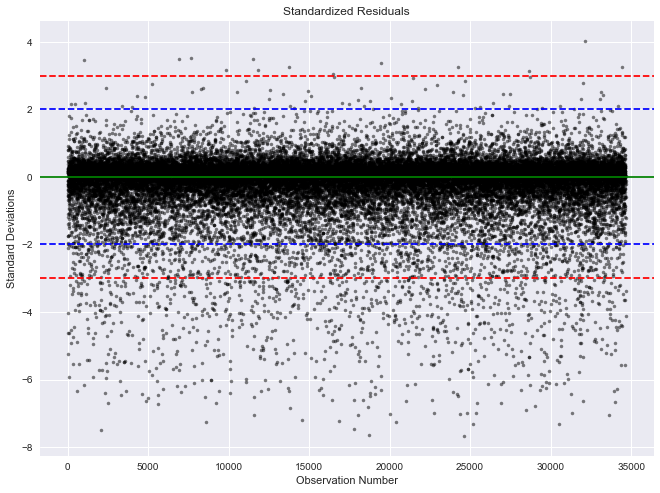

In [339]:

testing['resid'] = testing['pred']-testing['true']
testing['stdresid'] = testing['resid']/np.std(testing['resid'])

plt.plot(testing['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

In [341]:
testing['decile'] = pd.qcut(testing['pred'], 10, labels=False)
testing.to_csv('predictiontesting.csv')                        